# **Importing Libraries.......**

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# **Data Collection**

In [3]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [4]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Checking for number of rows and columns
diabetes_dataset.shape

(768, 9)

In [6]:
# Getting statistical measure
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Collecting information about dataset like datatype
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Counting the calues of "outcomes"
# 0---> Diabetes
# 1---> Non-diabetes
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [9]:
# Generating the mean value releted to "outcome"
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# **Splitting data**
# ****x--> Non-label data****
# ****y---> Label data****

In [10]:
X = diabetes_dataset.drop(columns='Outcome', axis=1)
y = diabetes_dataset['Outcome']

# **Train-test split**

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=14)
print("Training and test set sizes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Training and test set sizes: (614, 8) (154, 8) (614,) (154,)


In [12]:
# Create a ColumnTransformer to standardize data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.columns)
    ]
)

In [13]:
# Create a Pipeline with preprocessing and classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', svm.SVC(kernel='linear'))
])

# **Model Training**

In [14]:
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])),
                ('classifier', SVC(kernel='linear'))])

# **Model Evaluation on training data**

In [15]:
# Evaluate on training data
X_train_prediction = pipeline.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of the training data:', training_data_accuracy)

Accuracy score of the training data: 0.7671009771986971


# **Model Evaluation on testing data**

In [16]:
# Evaluate on test data
X_test_prediction = pipeline.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of the test data:', test_data_accuracy)

Accuracy score of the test data: 0.7662337662337663


# **Visual Representation**

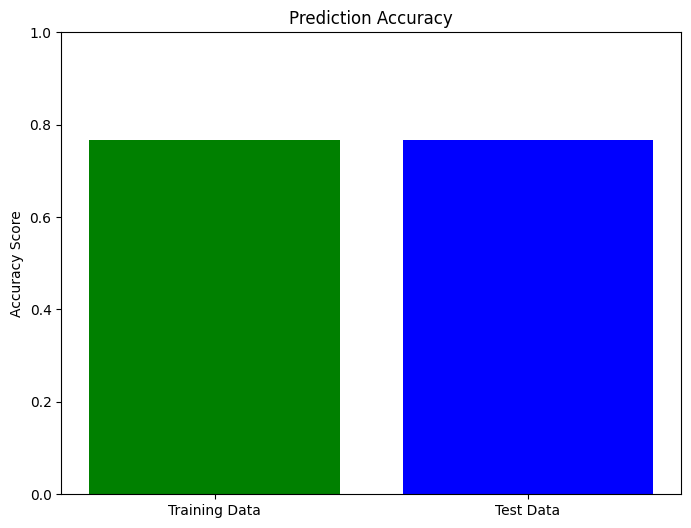

In [17]:
plt.figure(figsize=(8, 6))
plt.bar(['Training Data', 'Test Data'], [training_data_accuracy, test_data_accuracy], color=['green', 'blue'])
plt.title('Prediction Accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()

In [18]:
# Save the trained pipeline using Pickle
with open('diabetes_prediction_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)